In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std.shape

(45, 2)

In [3]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' 
      % (y_test != y_pred).sum())
print('Accuracy: %.2f' 
      % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy: 0.91


# Plot the decision regions

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [5]:
def plot_decision_regions(X, y, classifier, 
                          test_idx=None,
                          resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,
                                    resolution),
                           np.arange(x2_min, x2_max,
                                      resolution))
    Z = classifier.predict(np.array([xx1.ravel(),
                                     xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=65, label='test set', edgecolors='black')

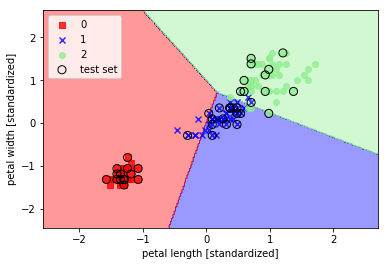

In [6]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Training a logistic regression model with scikit-learn

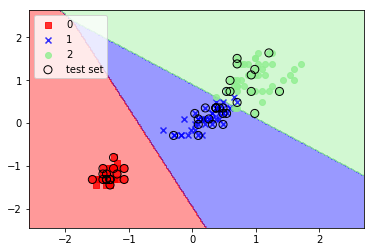

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=lr,
                      test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.show()

In [8]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1)).round(3)

array([[ 0.   ,  0.063,  0.937]])

# Tackling overfitting via regularization

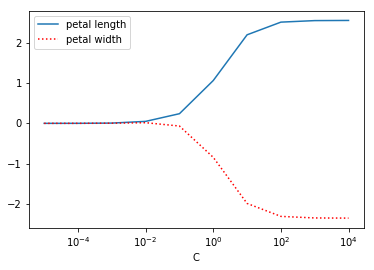

(10, 2)
float64
[ 0.6    0.6    0.6    0.6    0.6    0.8    0.956  0.978  0.978  0.978]


array([[  0.00000000e+00,   0.00000000e+00],
       [  1.00000000e-03,   0.00000000e+00],
       [  6.00000000e-03,   3.00000000e-03],
       [  4.90000000e-02,   1.60000000e-02],
       [  2.39000000e-01,  -6.60000000e-02],
       [  1.06000000e+00,  -8.42000000e-01],
       [  2.19200000e+00,  -1.98300000e+00],
       [  2.50600000e+00,  -2.30300000e+00],
       [  2.54400000e+00,  -2.34200000e+00],
       [  2.54800000e+00,  -2.34600000e+00]])

In [9]:
weights , params = [], []
score = []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    score.append(lr.score(X_test_std, y_test))
weights = np.array(weights)
score = np.array(score)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1],
         label='petal width',
         linestyle=':',
         color='r')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
plt.show()
print(weights.shape)
print(weights.dtype)
print(score.round(3))
weights.round(3)

# Support vector machines(SVM)

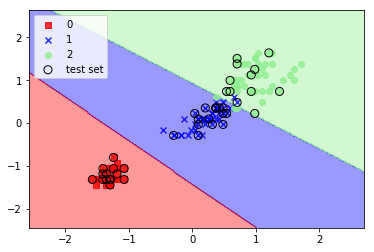

In [10]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.show()

/Users/ly/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


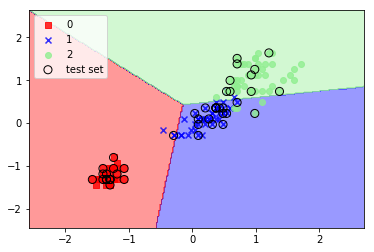

In [11]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')
ppn.fit(X_train_std, y_train)
lr.fit(X_train_std, y_train)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.show()

In [14]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor==True, 1, -1)

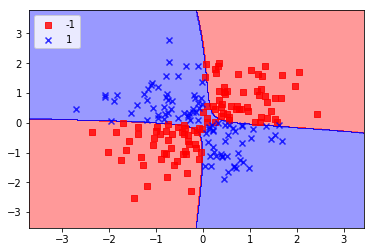

In [16]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

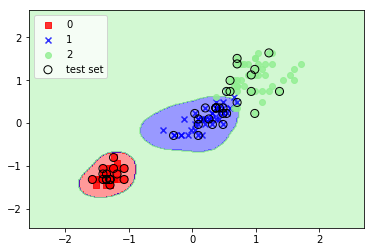

In [22]:
svm = SVC(kernel='rbf', random_state=0, gamma=10.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.show()